In [2]:
import numpy as np

class GradientDescentRegression:

    def __init__(self):
        """
        Initialize the Gradient Descent Regression model.
        """
        self.max_iteration = None
        self.lr = None
        self.coefs_ = None  # weights of your model
        self.intercept_ = None  # bias of your model

    def fit(self, X_train, y_train, lr=0.01, max_iteration=1000):
        """
        Fit the Gradient Descent Regression model to the training data.

        Parameters:
            X_train (numpy.ndarray): Training data features with shape (n_samples, n_features).
            y_train (numpy.ndarray): Target values with shape (n_samples,).
            lr (float): Learning rate, determines the step size in the gradient descent update (default=0.1).
            max_iteration (int): Maximum number of iterations for gradient descent (default=1000).
        """
        self.lr = lr
        self.max_iteration = max_iteration
        self.intercept_ = 0
        self.coefs_ = np.zeros(X_train.shape[1])
        X_train = np.array(X_train)
        y_train = np.array(y_train).reshape(len(y_train))
        m = X_train.shape[0]
        for i in range(self.max_iteration):
            fx = np.dot(X_train, self.coefs_) + self.intercept_
            intercept_gradient = -np.mean(y_train - fx)
            self.intercept_ -= self.lr * intercept_gradient

            coefficient_gradient = -np.dot((y_train - fx), X_train) / m
            self.coefs_ -= self.lr * coefficient_gradient

    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
            X (numpy.ndarray): Input data with shape (n_samples, n_features).

        Returns:
            numpy.ndarray: Predicted target values with shape (n_samples,).
        """
        return np.dot(X, self.coefs_) + self.intercept_

    def score(self, X, y_actual):
        """
        Calculate the coefficient of determination (R^2 score) of the model.

        Parameters:
            X (numpy.ndarray): Input data with shape (n_samples, n_features).
            y_actual (numpy.ndarray): Actual target values with shape (n_samples,).

        Returns:
            float: The R^2 score indicating the goodness of fit of the model.
        """
        y_actual = np.array(y_actual).reshape(len(y_actual))
        y_pred = self.predict(X)
        mean_y_actual = np.mean(y_actual)
        return 1 - (np.sum((y_actual - y_pred) ** 2) / np.sum((y_actual - mean_y_actual) ** 2))


# Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("...\\insurance.csv")

sexes = pd.get_dummies(df["sex"])
regions = pd.get_dummies(df["region"])
smokers = pd.get_dummies(df["smoker"])
df2 = pd.concat([df, sexes, regions, smokers], axis=1)
df2 = df2.drop(["sex", "region", "smoker"], axis=1)
charges = df2.pop('charges')
df2.insert(0, 'charges', charges)

xtrain, xtest, ytrain, ytest = train_test_split(df2.iloc[:, 1:], df2.iloc[:, 0])
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

# Usage (Example Result)

In [8]:
GD = GradientDescentRegression()
GD.fit(xtrain, ytrain,lr=0.294,max_iteration=1000)
prediction = GD.predict(xtest)
print(f"R-Square : {GD.score(xtest, ytest)}")

R-Square : 0.7672642952734356


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


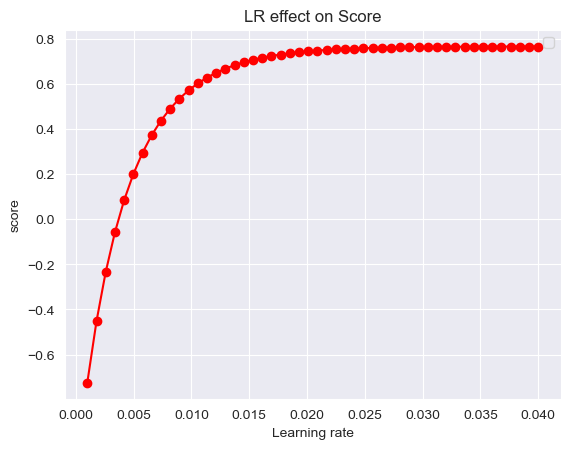

In [40]:
import matplotlib.pyplot as plt

GD = GradientDescentRegression()
scor = []
LR = list(np.linspace(0.001,0.04,50))
for r in range(len(LR)):
    GD.fit(xtrain, ytrain, lr=LR[r], max_iteration=100)
    scor.append(GD.score(xtest, ytest))

plt.plot(LR,scor, color="red", marker="o")
plt.xlabel('Learning rate')
plt.ylabel('score')
plt.title('LR effect on Score')
plt.legend()
plt.show()

# Compare with SKlearn Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain, ytrain)
print(f"R-Square : {lm.score(xtest, ytest)}")

R-Square : 0.7672642952734356
